## I. Thông tin về bộ dữ liệu

| Trường | Kiểu dữ liệu | Mô tả |
| ------ | ------------ | ----- |
| Year | integer | Năm hiện tại của dữ liệu |
| GDP | float | Tổng sản phẩm nội địa, tức là tổng sản phẩm quốc nội hay GDP (Gross Domestic Product) là giá trị thị trường của tất cả hàng hóa và dịch vụ cuối cùng được sản xuất ra trong phạm vi quốc gia VIệt Nam trong thời kỳ một năm (đơn vị tính: tỉ đô). |
| Unemployment rate | float | phần trăm số người từ nguồn lao động sẵn có không tìm được việc làm |

## II. Yêu cầu
1. **Xử lý dữ liệu - Data Imputation**:

    - Có một số giá trị bị thiếu trong tập dữ liệu đã cho, bạn có thể đề xuất cách điền vào những giá trị còn thiếu đó không?

2. **Khám phá dữ liệu - Data Exploration**

    - Bạn cần khám phá dữ liệu để hiển thị một số thông tin  thống kê  và phân tích của tập dữ liệu đã cho. Chẳng  hạn như thống  kê  về GDP  và Tỷ lê  thất  nghiệp
    - Trực  quan  các  kết  quả này
    - Có mối quan  hệ nào  giữa  GDP  và  Tỷ lệ thất nghiệp hay  không. Sự thấu  hiểu  thông  tin  sẽ hữu ích cho bạn trong các bước tiếp theo.

3. **Trích xuất đặc trưng - Feature Extraction**

    - Hãy đề xuất cách trích xuất đặc trưng từ bộ dữ liệu đã cho, cung cấp lý do và giải thích cách làm của bạn.

4. **Dự đoán - Prediction**

    - Hãy dự đoán tỉ lệ thất  nghiệp theo các đặc trưng bạn trích xuất ởtrên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train / Test là 8:2 với các độ đo phù hợp.

5. **Thảo luận**

    - Đây là một nhiệm vụ của khoa học dữ liệu khi giải quyết một thử thách, bạn được yêu cầu đưa ra ý kiến của  mình  về các giải pháp hiện tại của bạn cho thử thách này. Bạn cũng vui lòng cung cấp các thảo luận, ý tưởng của bạn về thu thập các đặc trưng mới, hiệu quả đểtăng tăng hiệu suất của mô hình

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats

Đọc dữ liệu sẽ chuyển vị

In [2]:
df = pd.read_excel('Vietnam-Macroeconomic-Data.xls').T
df

,0,1
Year,"GDP, current prices (Billions of U.S. dollars)",Unemployment rate
1980,27.847,no data
1981,13.875,no data
1982,18.405,no data
1983,27.726,no data
1984,48.177,no data
1985,14.999,no data
1986,33.873,no data
1987,42.045,no data
1988,23.234,no data


In [3]:
df.shape

(40, 2)

In [4]:
df.drop('Year', inplace=True) # xóa hàng đầu tiên
df.reset_index(inplace=True) # lấy cột year từ cột index
new_name = ['year', 'gdp', 'unemployment_rate'] # đổi tên cột
df.columns = new_name
df['year'] = df['year'].astype('int64')
df

,year,gdp,unemployment_rate
0,1980,27.847,no data
1,1981,13.875,no data
2,1982,18.405,no data
3,1983,27.726,no data
4,1984,48.177,no data
5,1985,14.999,no data
6,1986,33.873,no data
7,1987,42.045,no data
8,1988,23.234,no data
9,1989,6.293,no data


In [5]:
# điền dữ liệu no data thành nan
for i in df.index:
    if (isinstance(df.unemployment_rate[i], str)):
        df.loc[i, 'unemployment_rate'] = np.nan

In [6]:
df = df.astype('float32')

In [7]:
df_without_nan = df.dropna()
df_without_nan

,year,gdp,unemployment_rate
10,1990.0,6.472000,12.3
11,1991.0,7.642000,10.4
12,1992.0,9.867000,11.0
13,1993.0,13.181000,10.6
14,1994.0,16.312000,10.3
15,1995.0,20.798000,5.8
16,1996.0,24.691999,5.9
17,1997.0,26.892000,6.0
18,1998.0,27.233999,6.9
19,1999.0,28.702000,6.7


In [8]:
df.shape

(39, 3)

In [9]:
df.isna().sum()

year                  0
gdp                   0
unemployment_rate    10
dtype: int64

In [10]:
df.describe()

,year,gdp,unemployment_rate
count,39.000000,39.000000,29.000000
mean,1999.000000,67.716080,5.703449
std,11.401754,68.195656,2.855006
min,1980.000000,6.293000,2.100000
25%,1989.500000,22.016000,4.300000
50%,1999.000000,33.873001,5.600000
75%,2008.500000,99.951500,6.400000
max,2018.000000,241.272003,12.300000


In [11]:
gdp = df_without_nan.gdp.values
unemployment_rate = df_without_nan.unemployment_rate.values

In [12]:
gdp.astype('float32')

array([  6.472,   7.642,   9.867,  13.181,  16.312,  20.798,  24.692,
        26.892,  27.234,  28.702,  31.176,  32.524,  35.097,  39.563,
        49.52 ,  57.648,  66.393,  77.52 ,  98.269, 101.634, 112.771,
       134.598, 155.483, 170.444, 185.759, 191.288, 201.326, 220.376,
       241.272], dtype=float32)

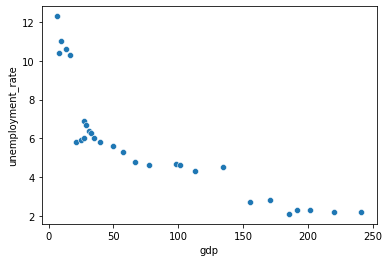

In [13]:
ax = sns.scatterplot(data=df_without_nan, x='gdp', y='unemployment_rate')

- Quan sát ban đầu thì dữ liệu có sự tương quan ngịch, nếu gdp tăng thì tỉ lệ thất nghiệp sẽ giảm

In [14]:
def cv(x):
    return round(np.std(x) * 100 / np.mean(x), 2)

Basically CV<10 is very good, 10-20 is good, 20-30 is acceptable, and CV>30 is not acceptable.

In [15]:
print('Hệ số tương quan (cofficient of covariance) giữa GDP và tỉ lệ thất nghiệp:', \
      cv(gdp), cv(unemployment_rate))

Hệ số tương quan (cofficient of covariance) giữa GDP và tỉ lệ thất nghiệp: 87.87 49.19


asd
<!-- - Theo hệ số tương quan thì 2 biến gdp và tỉ lệ thất nghiệp có một mối tương quan dương -->

In [16]:
gdp.shape

(29,)

In [17]:
gdp

array([  6.472,   7.642,   9.867,  13.181,  16.312,  20.798,  24.692,
        26.892,  27.234,  28.702,  31.176,  32.524,  35.097,  39.563,
        49.52 ,  57.648,  66.393,  77.52 ,  98.269, 101.634, 112.771,
       134.598, 155.483, 170.444, 185.759, 191.288, 201.326, 220.376,
       241.272], dtype=float32)

In [18]:
unemployment_rate

array([12.3, 10.4, 11. , 10.6, 10.3,  5.8,  5.9,  6. ,  6.9,  6.7,  6.4,
        6.3,  6. ,  5.8,  5.6,  5.3,  4.8,  4.6,  4.7,  4.6,  4.3,  4.5,
        2.7,  2.8,  2.1,  2.3,  2.3,  2.2,  2.2], dtype=float32)

In [19]:
pearson_corr = np.corrcoef(gdp, unemployment_rate)[0, 1]
print(f'Correlation giữa 2 biến GDP và tỉ lệ thất nghiệp {pearson_corr}')

Correlation giữa 2 biến GDP và tỉ lệ thất nghiệp -0.8315774391118677


- Sau khi có giá trị correlation như thế này, chúng ta có thể thấy rõ được mối tương quan giữa GDP và tỉ lệ thất nghiệp là tương quan ngịch
- Có thể do càng cần nhiều sản phẩm, nên tỉ lệ thất nghiệp sẽ giảm

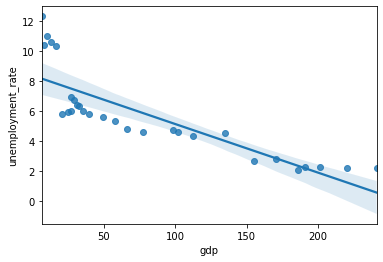

In [20]:
sns.regplot(data=df_without_nan, x='gdp', y='unemployment_rate');

In [21]:
df[df.unemployment_rate.isna()]

,year,gdp,unemployment_rate
0,1980.0,27.847000,NaN
1,1981.0,13.875000,NaN
2,1982.0,18.405001,NaN
3,1983.0,27.726000,NaN
4,1984.0,48.176998,NaN
5,1985.0,14.999000,NaN
6,1986.0,33.873001,NaN
7,1987.0,42.044998,NaN
8,1988.0,23.233999,NaN
9,1989.0,6.293000,NaN


In [22]:
df[~df.unemployment_rate.isna()]

,year,gdp,unemployment_rate
10,1990.0,6.472000,12.3
11,1991.0,7.642000,10.4
12,1992.0,9.867000,11.0
13,1993.0,13.181000,10.6
14,1994.0,16.312000,10.3
15,1995.0,20.798000,5.8
16,1996.0,24.691999,5.9
17,1997.0,26.892000,6.0
18,1998.0,27.233999,6.9
19,1999.0,28.702000,6.7


In [23]:
X_empty = df[df.unemployment_rate.isna()].gdp.values.reshape(-1, 1)

In [24]:
X = df[~df.unemployment_rate.isna()].gdp.values.reshape(-1, 1)
y = df[~df.unemployment_rate.isna()].unemployment_rate.values
X.shape, y.shape

((29, 1), (29,))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
Xtrain.shape, Xtest.shape

((20, 1), (9, 1))

In [28]:
ytrain.shape, ytest.shape

((20,), (9,))

In [29]:
def rmse(valid, predict):
    mse = mean_squared_error(predict, valid)
    return math.sqrt(mse)

In [30]:
def make_df(y_nan_predicted):
    gdp_new = df.gdp.values
    unemployment_rate = list(y_nan_predicted.reshape(-1)) + list(df_without_nan.unemployment_rate.values)
    foo = pd.DataFrame({'year': df.year, 'gdp': gdp_new, 'unemployment_rate': unemployment_rate}, index=df.index)
    return foo

In [31]:
def make_plot(y_empty, algos, s=100):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    sns.scatterplot(data=df, x='gdp', y='unemployment_rate', ax=ax[0], s=s, alpha=0.8)
    sns.scatterplot(
        data=pd.DataFrame({
            'gdp': X_empty.reshape(-1),
            'unemployment_rate': y_empty
        }),
        x='gdp',
        y='unemployment_rate',
        color='red',
        s=s
    )
    sns.scatterplot(
        data=pd.DataFrame({
            'gdp': df_without_nan.gdp,
            'unemployment_rate': df_without_nan.unemployment_rate
        }),
        x='gdp',
        y='unemployment_rate',
        ax=ax[1],
        s=s,
        alpha=0.8,
    )
    ax[0].set_title('Dữ liệu ban đầu', fontsize=15)
    ax[1].set_title(f'Sau khi dùng ${algos}$ điền dữ liệu trống', fontsize=15)
    ax[0].grid(True, alpha=0.75, ls='-.')
    ax[1].grid(True, alpha=0.75, ls='-.')
    f.suptitle('2 Biểu đồ thể hiện mối tương quan của dữ liệu gdp và tỉ lệ thất nghiệp',
               fontsize=20, weight='bold')
    plt.show()

In [32]:
def gdp_growth_a_year(s, f):
    return round(((f - s) * 100) / s, 2)

### Root mean squared error 

$y$ là giá trị thực
    
$\hat{y}$ là giá trị dự đoán

$N$ là số lượng

<div style="width: 45%; padding: 5px 10px; margin: 0 auto; font-size:30px">

$RMSE = \sqrt{\sum_{i=1}^{N}\frac{(y_i - \hat{y_i})^2}{N} }$

<div>

### Giả sử impute data sử dụng Linear Regression
- Khi vẽ biểu đồ scatter lên, ta thấy có sự tương quan nghịch giữa 2 biến của data là gdp và tỉ lệ thất nghiệp
- Dựa vào đó ta có thể sử dụng *hồi quy tuyến tính* để điền vào những dữ liệu nan chỉ cần phụ thuộc vào một biến là biến `gdp`

**Công thức của hồi quy tuyến tính**
<div style="margin: 0 auto; padding: 5px 10px; width: 20%;">

$\beta_0 = \beta_1x + y$
    
$\implies y = \beta_0 - \beta_1x$
<div>

In [33]:
lig_impute = LinearRegression()
lig_impute.fit(Xtrain, ytrain)
ypredict = lig_impute.predict(Xtest)

print(f'Linear Regression RMSE: {rmse(ytest, ypredict)}')
print(f'Linear Regression R² Score: {r2_score(ytest, ypredict)}')

# Dự đoán bộ data bị nan
y_empty_predicted_linear = lig_impute.predict(X_empty)

Linear Regression RMSE: 1.3946775044487543
Linear Regression R² Score: 0.735485920035581


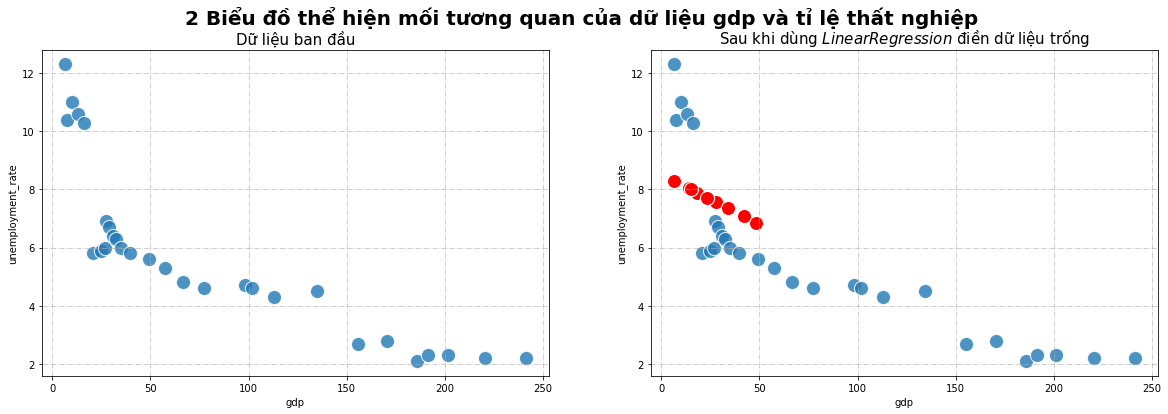

In [34]:
make_plot(y_empty_predicted_linear, 'Linear Regression', s=200)

In [35]:
print(f'RMSE: {rmse(ytest, ypredict)}')
print(f'R² Score: {r2_score(ytest, ypredict)}')

RMSE: 1.3946775044487543
R² Score: 0.735485920035581


- Kết quả dự đoán tỉ lệ ngịch biến giống như dữ liệu ban đầu
- **RMSE** ~ 1.39
- **R² Score** được 0.73, nghĩa là 70% tỉ lệ giống với bộ test ban đầu
- Các dữ liệu được điền nằm trên đường tuyến tính

### Giả sử điền dữ liệu vào Random Forest
- Random Forest là mô hình ensemble sử dụng bootstrap để tạo ra các sample và có tỉ lệ lỗi thấp
- Xem thử tỉ lệ chính xác của model này so với Linear Regression là bao nhiêu

In [36]:
rf = RandomForestRegressor(n_estimators=150, oob_score=True, random_state=0)
rf.fit(Xtrain, ytrain)
ypredict = rf.predict(Xtest)
print(f'Random Forest RMSE: {rmse(ytest, ypredict)}')
print(f'Random Forest R² Score: {r2_score(ytest, ypredict)}')
print(f'Out-of-bag score: {rf.oob_score_}')

# Dự đoán bộ data bị nan
y_empty_predicted_rf = rf.predict(X_empty)

Random Forest RMSE: 0.5069716985285672
Random Forest R² Score: 0.9650482765146686
Out-of-bag score: 0.9126177695486986


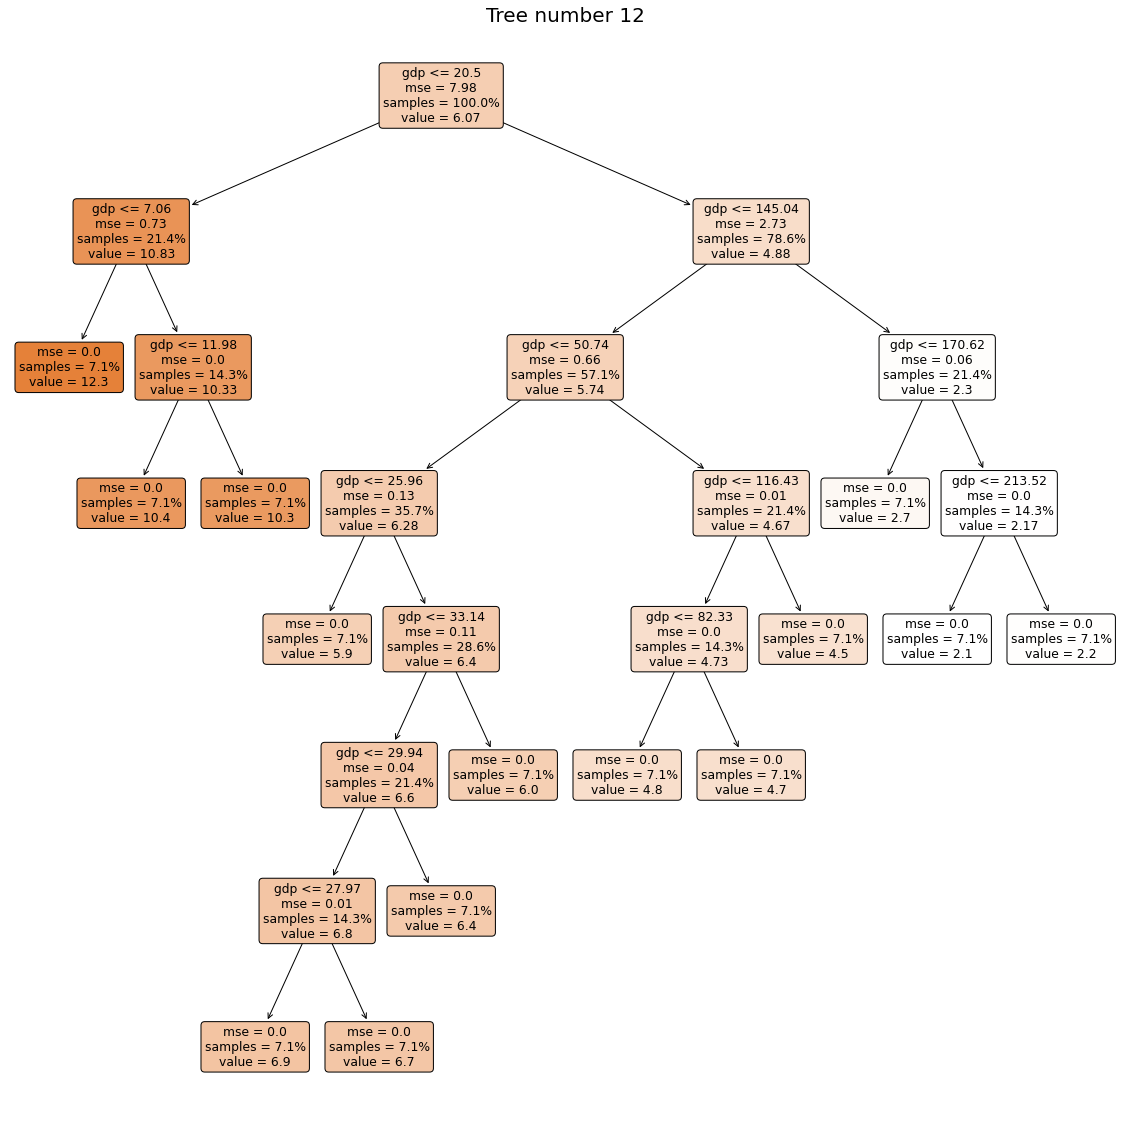

In [37]:
from sklearn import tree
import random
r_ = random.randint(1, 150)
f, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(
    rf.estimators_[r_],
    feature_names=['gdp'],
    class_names=['unemployment_rate'],
    rounded=True, proportion=True,
    precision=2, filled=True
)
ax.set_title(f'Tree number {r_}', fontsize=20)
plt.show()

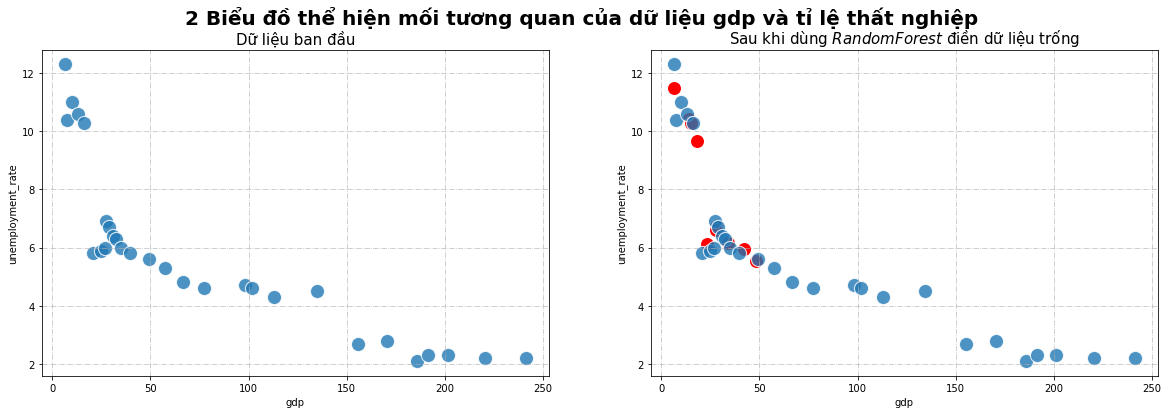

In [38]:
make_plot(y_empty_predicted_rf, 'Random Forest', s=200)

### Giả sử điền dữ liệu trống bằng Gradient Boosting

In [39]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(Xtrain, ytrain)
ypredict = gb.predict(Xtest)

print(f'Gradient Boosting RMSE: {rmse(ytest, ypredict)}')
print(f'Gradient Boosting R² Score: {r2_score(ytest, ypredict)}')

# Dự đoán bộ data bị nan
y_empty_predicted_gb = gb.predict(X_empty)

Gradient Boosting RMSE: 0.25669146229876755
Gradient Boosting R² Score: 0.9910396698365002


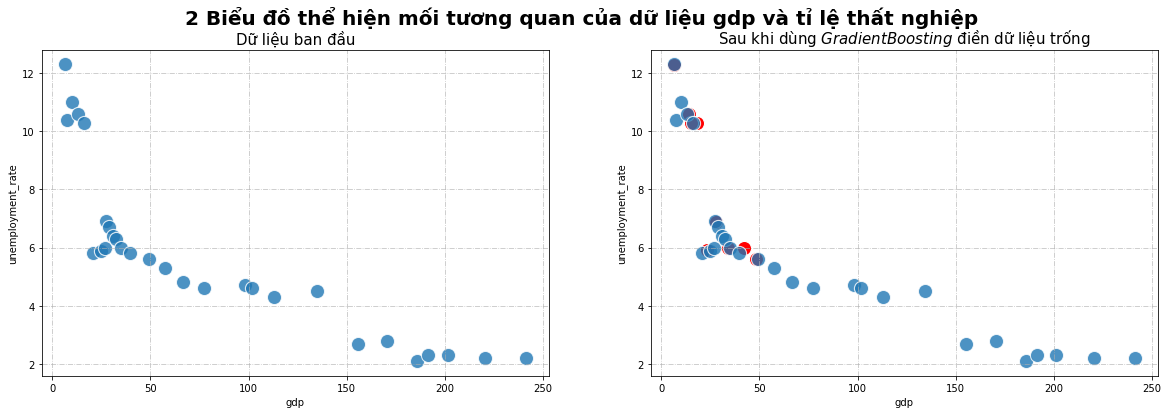

In [40]:
make_plot(y_empty_predicted_gb, 'Gradient Boosting', s=200)

Các giá trị dự đoán(màu đỏ) khá gần với các giá trị thực tế(màu xanh)

### Dùng Gradient Boosting và cho phép học toàn bộ dữ liệu
- thay thế nan trong bộ dữ liệu cũ

In [41]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X, y)

y_empty_predicted = gb.predict(X_empty)
df = make_df(y_empty_predicted)

## Kết luận về điền dữ liệu
- Random Forest đưa ra độ lỗi thấp hơn Linear Regression, và Gradient Boosting tốt hơn nhiều so với 2 thuật toán kia

In [42]:
df

,year,gdp,unemployment_rate
0,1980.0,27.847000,6.870836
1,1981.0,13.875000,10.599070
2,1982.0,18.405001,10.297658
3,1983.0,27.726000,6.870836
4,1984.0,48.176998,5.598062
5,1985.0,14.999000,10.297658
6,1986.0,33.873001,5.999088
7,1987.0,42.044998,5.802600
8,1988.0,23.233999,5.904182
9,1989.0,6.293000,12.293186


# Phân tích khám phá dữ liệu

### Tính độ tăng trưởng hàng năm của nhiều năm: 

<div style="font-size: 25px; margin: 0 auto; padding: 10px;">
$[(\frac{f}{s})^{\frac{1}{y}} - 1 ] \times 100$
</div>

$\textbf{Trong đó:}$
    
- $s:$ giá trị bắt đầu
    
- $f:$ giá trị kết thúc

- $y:$ số năm cần tính

In [43]:
def gdp_growing_rate(s, f, y):
    return round(((f / s) ** (1 / y) - 1) * 100, 2)

In [44]:
s = df.loc[df.year == 1980, :].gdp.values[0]
f = df.loc[df.year == 2018, :].gdp.values[0]
y = 2018 - 1980
growing_rate = gdp_growing_rate(s, f, y)
print(f'Tốc độ tăng trưởng hàng năm của nhiều năm: {growing_rate}%')

Tốc độ tăng trưởng hàng năm của nhiều năm: 5.85%


<AxesSubplot:xlabel='gdp', ylabel='Count'>

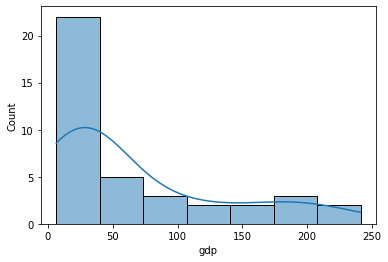

In [45]:
sns.histplot(df, x='gdp', kde=True)

<AxesSubplot:xlabel='unemployment_rate', ylabel='Count'>

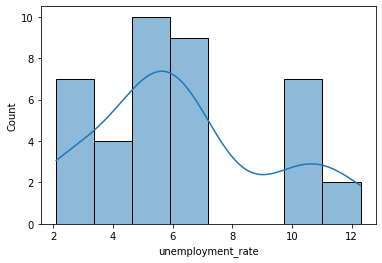

In [46]:
sns.histplot(df, x='unemployment_rate', kde=True)

In [47]:
def make_scatter_line_plot(x, y, name, figsize=(10, 5)):
    f, ax = plt.subplots(figsize=figsize)
    ax.plot(df[x[0]], df[y[0]], lw=2, ls='--')
    ax.scatter(data=df, x=x[0], y=y[0], c='purple')
    ax.set_title(f'Biểu đồ thể hiện {name} theo năm', fontsize=15, weight='bold')
    ax.set_xlabel(f'{x[1]}', fontsize=13)
    ax.set_ylabel(f'{y[1]}', fontsize=13)
    ax.grid(True, alpha=0.70, ls='-.', c='green')
    plt.show()

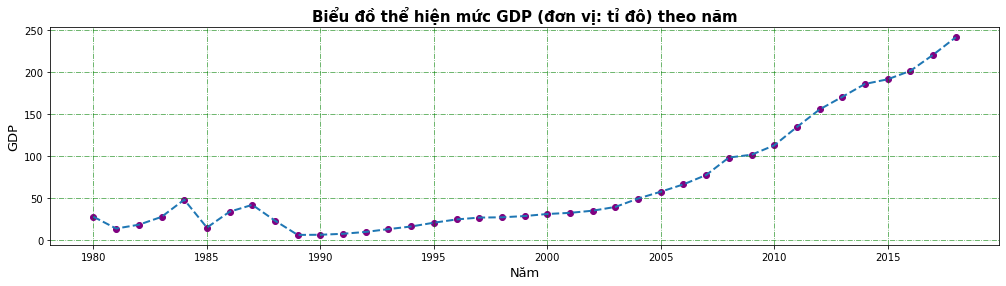

In [48]:
make_scatter_line_plot(('year', 'Năm'), ('gdp', 'GDP'), 'mức GDP (đơn vị: tỉ đô)', figsize=(17, 4))

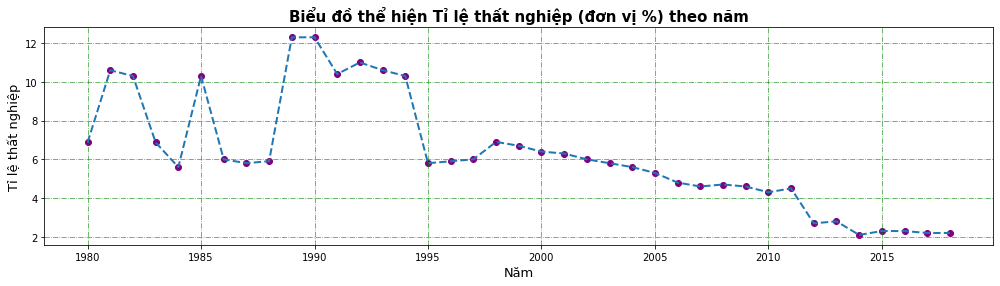

In [49]:
make_scatter_line_plot(('year', 'Năm'), ('unemployment_rate', 'Tỉ lệ thất nghiệp'), 'Tỉ lệ thất nghiệp (đơn vị %)', figsize=(17, 4))

In [50]:
k = df.gdp.values
k = [gdp_growth_a_year(k[i - 1], k[i]) for i in range(1, len(k))]
k = [k[0]] + k
df['gdp_growth_in_a_year'] = k

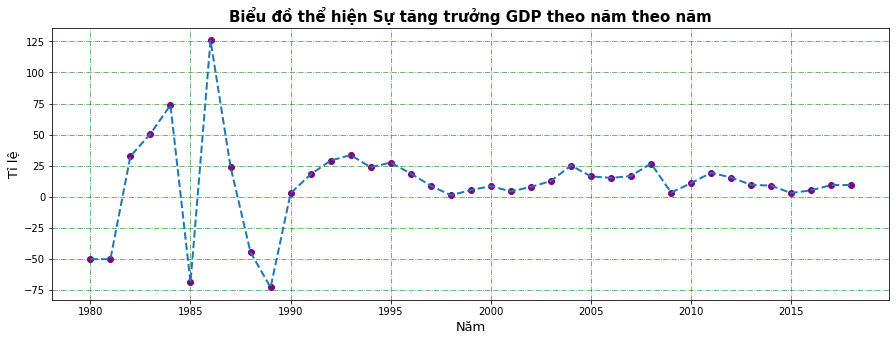

In [51]:
make_scatter_line_plot(('year', 'Năm'), ('gdp_growth_in_a_year', 'Tỉ lệ'), 'Sự tăng trưởng GDP theo năm', figsize=(15, 5))

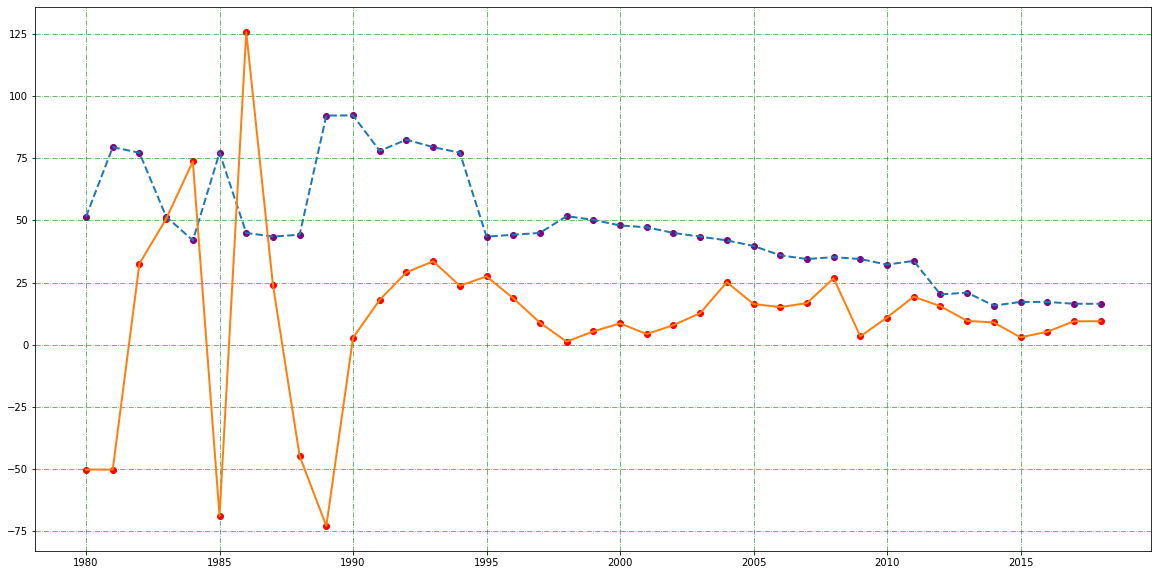

In [52]:
f, ax = plt.subplots(figsize=(20, 10))
foo = df.copy()
foo['unemployment_rate'] *= 7.5
ax.plot(foo['year'], foo['unemployment_rate'], lw=2, ls='--')
ax.scatter(data=foo, x='year', y='unemployment_rate', c='purple')
ax.grid(True, alpha=0.70, ls='-.', c='green')
ax.plot(df['year'], df['gdp_growth_in_a_year'], lw=2)
ax.scatter(data=df, x='year', y='gdp_growth_in_a_year', c='red')
plt.show()

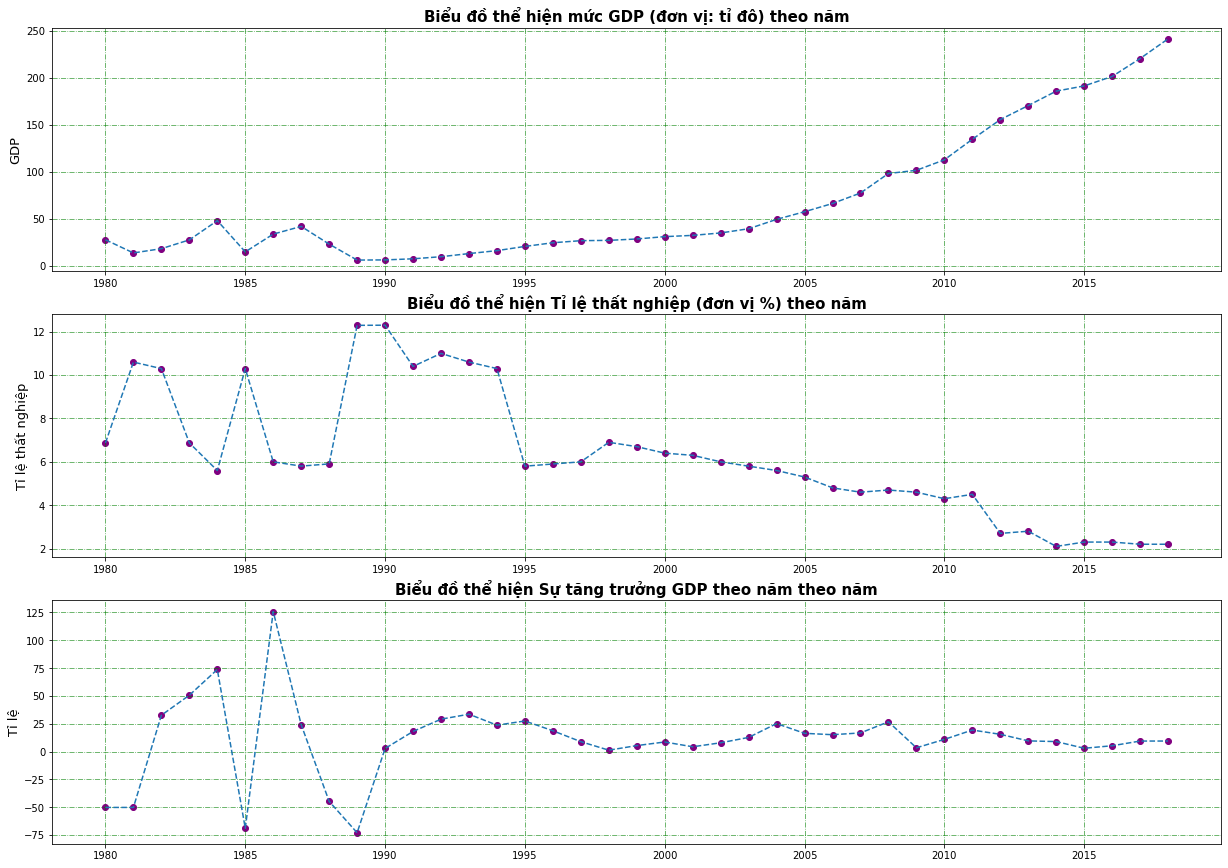

In [53]:
f, ax = plt.subplots(figsize=(17, 12), nrows=3, ncols=1)

for i, (x, y, name) in enumerate([
    [('year', 'Năm'), ('gdp', 'GDP'), 'mức GDP (đơn vị: tỉ đô)'],
    [('year', 'Năm'), ('unemployment_rate', 'Tỉ lệ thất nghiệp'), 'Tỉ lệ thất nghiệp (đơn vị %)'],
    [('year', 'Năm'), ('gdp_growth_in_a_year', 'Tỉ lệ'), 'Sự tăng trưởng GDP theo năm']
]):
    ax[i].plot(df[x[0]], df[y[0]], ls='--')
    ax[i].scatter(data=df, x=x[0], y=y[0], c='purple')
    ax[i].set_title(f'Biểu đồ thể hiện {name} theo năm', fontsize=15, weight='bold')
    ax[i].set_ylabel(f'{y[1]}', fontsize=13)
    ax[i].grid(True, alpha=0.70, ls='-.', c='green')
f.tight_layout(pad=0.5)
plt.show()

# Tiền xử lý dữ liệu

In [54]:
data = df.copy()

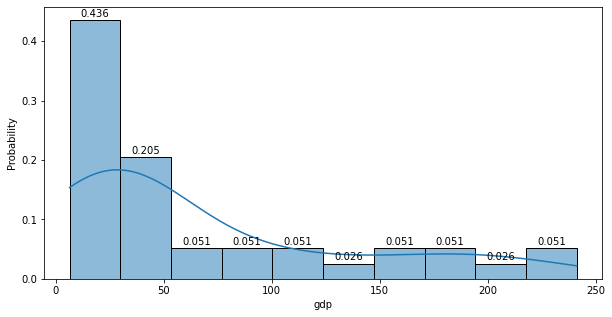

In [55]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.histplot(data, x='gdp', kde=True, stat='probability', ax=ax, bins=10)
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.3f'),
        (p.get_x() + p.get_width() / 2, p.get_height() + 0.006), 
        ha='center', fontsize=10
    )
plt.show()

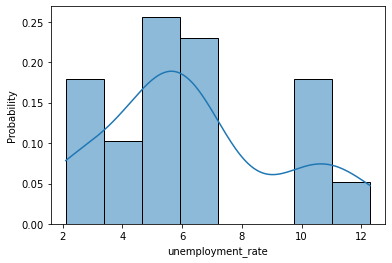

In [56]:
sns.histplot(data, x='unemployment_rate', kde=True, stat='probability');

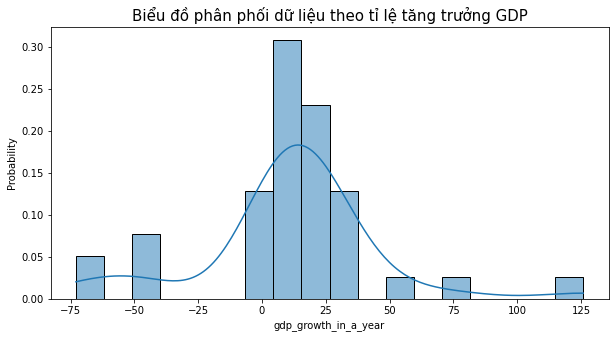

In [57]:
f, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df, x='gdp_growth_in_a_year', kde=True, stat='probability')
ax.set_title('Biểu đồ phân phối dữ liệu theo tỉ lệ tăng trưởng GDP', fontsize=15)
plt.show()

In [58]:
df.describe()

,year,gdp,unemployment_rate,gdp_growth_in_a_year
count,39.000000,39.000000,39.000000,39.000000
mean,1999.000000,67.716080,6.305979,10.723590
std,11.401754,68.195656,2.931456,34.707529
min,1980.000000,6.293000,2.100000,-72.910000
25%,1989.500000,22.016000,4.600000,4.785000
50%,1999.000000,33.873001,5.900000,10.960000
75%,2008.500000,99.951500,6.885418,23.940000
max,2018.000000,241.272003,12.300000,125.840000


- Tỉ lệ tăng trưởng GDP theo năm phân phối theo Gaussian nên có thể sử dụng Normalization

In [59]:
def normalize(data):
    return MinMaxScaler().fit_transform(data)

In [60]:
def standardize(data):
    return StandardScaler().fit_transform(data)

In [61]:
data = pd.DataFrame(standardize(data), columns=data.columns)

# Train model

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
predicts = 'unemployment_rate'
# features = ['gdp', 'gdp_growth_in_a_year']
features = ['gdp', 'year']
X = data[features].values.copy()
y = data[predicts].values.copy()

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((31, 2), (8, 2), (31,), (8,))

In [65]:
class Model:
    def __init__(self, model, name):
        self.model = model
        self.name = name
        self.trained = False
        self.rmse = None
        self.r2 = None
    
    def fitting(self, Xtrain, Xtest, ytrain, ytest):
        self.Xtrain = Xtrain
        self.Xtest = Xtest
        self.ytrain = ytrain
        self.ytest = ytest
        self.trained = True
        self.model.fit(Xtrain, ytrain)
        self.ypredict = self.model.predict(Xtest)
        self.rmse = rmse(ytest, self.ypredict)
        self.r2 = r2_score(ytest, self.ypredict)
        print(self.model)
    
    def __repr__(self):
        if not self.trained:
            return f'<{self.name}(is not trained yet)>'
        return f'<{self.name}(R²: [{self.r2}], RMSE: [{self.rmse}])'

In [66]:
models = [
    Model(GradientBoostingRegressor(random_state=0), 'Gradient Boosting'),
    Model(RandomForestRegressor(random_state=0), 'Random Forest'),
    Model(LinearRegression(), 'Linear Regression'),
    Model(MLPRegressor(random_state=0), 'Multi-layer Perceptron'),
    Model(DecisionTreeRegressor(random_state=0), 'Decision Tree'),
    Model(AdaBoostRegressor(random_state=0), 'Ada Boost'),
]
models

[<Gradient Boosting(is not trained yet)>,
 <Random Forest(is not trained yet)>,
 <Linear Regression(is not trained yet)>,
 <Multi-layer Perceptron(is not trained yet)>,
 <Decision Tree(is not trained yet)>,
 <Ada Boost(is not trained yet)>]

In [67]:
for i in range(len(models)):
    models[i].fitting(Xtrain, Xtest, ytrain, ytest)

GradientBoostingRegressor(random_state=0)
RandomForestRegressor(random_state=0)
LinearRegression()
MLPRegressor(random_state=0)
DecisionTreeRegressor(random_state=0)
AdaBoostRegressor(random_state=0)


C:\Users\Tuan Nguyen Van Anh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
models

[<Gradient Boosting(R²: [0.9961289965802319], RMSE: [0.062128907033259885]),
 <Random Forest(R²: [0.9880521239498726], RMSE: [0.109150892293499]),
 <Linear Regression(R²: [0.6631625143330979], RMSE: [0.579551647252936]),
 <Multi-layer Perceptron(R²: [0.7728940314837582], RMSE: [0.475878638173394]),
 <Decision Tree(R²: [0.966164796294789], RMSE: [0.18368188764720725]),
 <Ada Boost(R²: [0.9886523937749586], RMSE: [0.10637365075909463])]

In [69]:
models_name = [i.name for i in models]
models_rmse = [i.rmse for i in models]
models_r2 = [i.r2 for i in models]

models_df = pd.DataFrame({
    'name': models_name,
    'rmse': models_rmse,
    'r2': models_r2
})

models_df

,name,rmse,r2
0,Gradient Boosting,0.062129,0.996129
1,Random Forest,0.109151,0.988052
2,Linear Regression,0.579552,0.663163
3,Multi-layer Perceptron,0.475879,0.772894
4,Decision Tree,0.183682,0.966165
5,Ada Boost,0.106374,0.988652


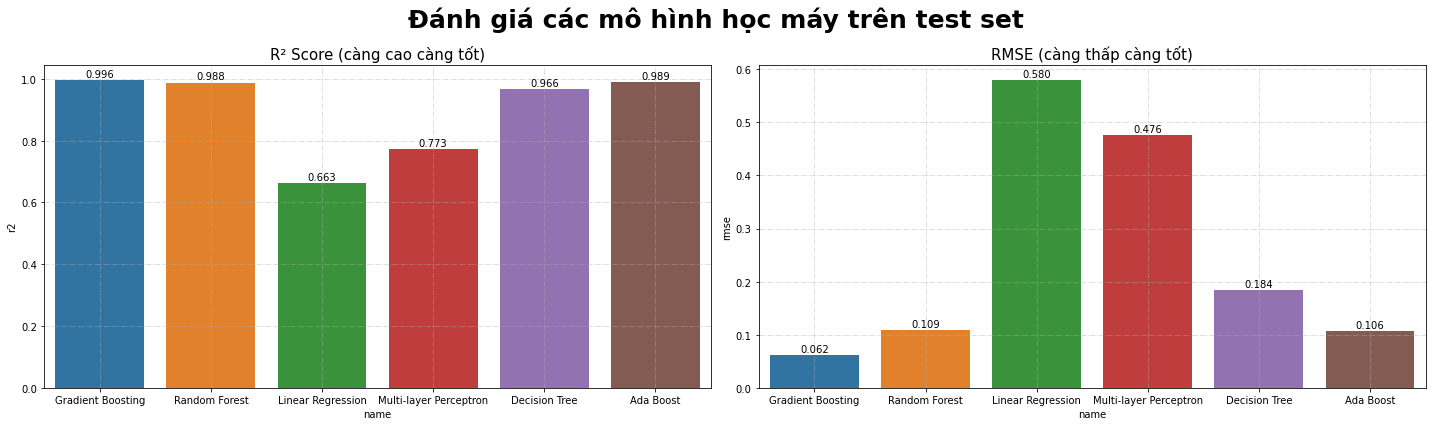

In [70]:
f, ax = plt.subplots(figsize=(20, 6), nrows=1, ncols=2)
g1 = sns.barplot(data=models_df, x='name', y='r2', orient='v', ax=ax[0])
g2 = sns.barplot(data=models_df, x='name', y='rmse', orient='v', ax=ax[1])

for p in g1.patches:
    ax[0].annotate(
        format(p.get_height(), '.3f'),
        (p.get_x() + p.get_width() / 2, p.get_height() + 0.01), 
        ha='center'
    )
    
for p in g2.patches:
    ax[1].annotate(
        format(p.get_height(), '.3f'),
        (p.get_x() + p.get_width() / 2, p.get_height() + 0.006), 
        ha='center', fontsize=10
    )

ax[0].grid(True, alpha=0.5, ls='-.')
ax[0].set_title('R² Score (càng cao càng tốt)', fontsize=15)
ax[1].grid(True, alpha=0.5, ls='-.')
ax[1].set_title('RMSE (càng thấp càng tốt)', fontsize=15)
f.suptitle('Đánh giá các mô hình học máy trên test set', fontsize=25, fontweight='bold')
f.tight_layout()

In [71]:
models[0].ypredict

array([-0.14559468, -0.61209309, -0.6892337 , -1.24605386, -1.38395266,
       -0.30483434,  2.06755765, -0.10611553])

In [72]:
models[0].ytest

array([-0.24464681, -0.55500516, -0.5895638 , -1.21162001, -1.45353078,
       -0.34765295,  2.07145459, -0.10574226])

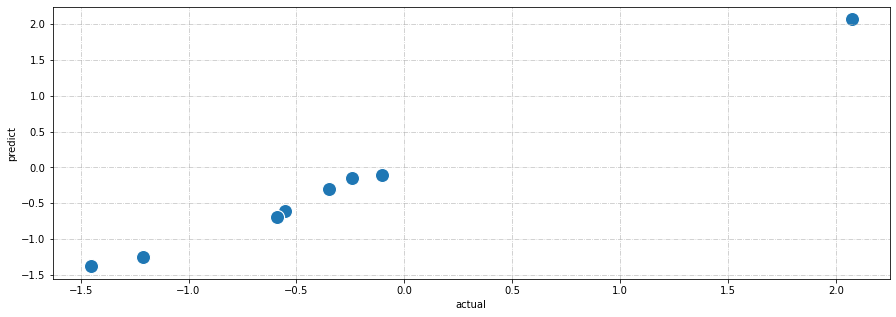

In [73]:
f, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=pd.DataFrame({'predict': models[0].ypredict, 'actual': models[0].ytest}), x='actual', y='predict', ax=ax, s=200)
ax.grid(True, ls='-.', alpha=0.75, lw=0.75)

In [74]:
cv(gdp)

87.87

In [75]:
df.describe()

,year,gdp,unemployment_rate,gdp_growth_in_a_year
count,39.000000,39.000000,39.000000,39.000000
mean,1999.000000,67.716080,6.305979,10.723590
std,11.401754,68.195656,2.931456,34.707529
min,1980.000000,6.293000,2.100000,-72.910000
25%,1989.500000,22.016000,4.600000,4.785000
50%,1999.000000,33.873001,5.900000,10.960000
75%,2008.500000,99.951500,6.885418,23.940000
max,2018.000000,241.272003,12.300000,125.840000


In [76]:
df['year'] = df['year'].astype('int64')

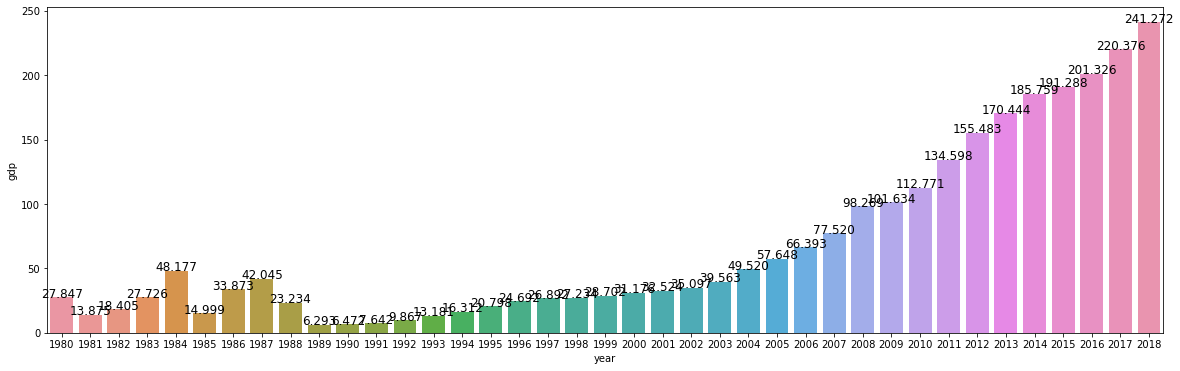

In [77]:
f, ax = plt.subplots(figsize=(20, 6))
g = sns.barplot(data=df, x='year', y='gdp', ax=ax)
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.3f'),
        (p.get_x() + p.get_width() / 2, p.get_height() + 0.006), 
        ha='center', fontsize=12
    )
plt.show()

Text(0.5, 1.0, 'Biểu đồ heatmap thể hiện mối tương quan giữa các thuộc tính trong dữ liệu')

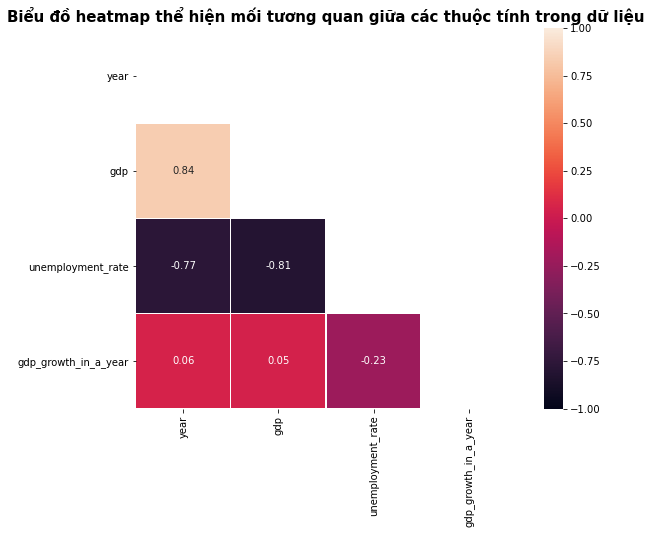

In [78]:
f, ax = plt.subplots(figsize=(10, 7))
data = df.corr()
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask, linewidth=.3, cmap='rocket', center=0, square=True);
ax.set_title('Biểu đồ heatmap thể hiện mối tương quan giữa các thuộc tính trong dữ liệu', fontsize=15, weight='bold')

- Mối tương quan giữa gdp và tỉ lệ thất nghiệp và năm khá cao, lần lượt là 0.84, và -0.77
- Mối tương quan giữa gdp và tỉ lệ tăng trưởng gdp không nói lên được gì cả, do mối tương quan khá thấp -> 0.06

<AxesSubplot:xlabel='gdp', ylabel='gdp_growth_in_a_year'>

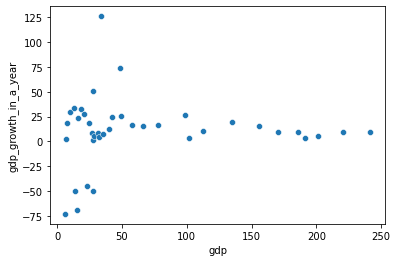

In [79]:
sns.scatterplot(data=df, x='gdp', y='gdp_growth_in_a_year')

<AxesSubplot:xlabel='gdp_growth_in_a_year', ylabel='unemployment_rate'>

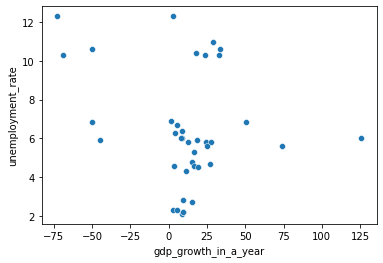

In [80]:
sns.scatterplot(data=df, x='gdp_growth_in_a_year', y='unemployment_rate')

In [81]:
df

,year,gdp,unemployment_rate,gdp_growth_in_a_year
0,1980,27.847000,6.870836,-50.17
1,1981,13.875000,10.599070,-50.17
2,1982,18.405001,10.297658,32.65
3,1983,27.726000,6.870836,50.64
4,1984,48.176998,5.598062,73.76
5,1985,14.999000,10.297658,-68.87
6,1986,33.873001,5.999088,125.84
7,1987,42.044998,5.802600,24.13
8,1988,23.233999,5.904182,-44.74
9,1989,6.293000,12.293186,-72.91


In [82]:
foo = pd.melt(df, id_vars=['year', 'gdp'])

In [83]:
foo[foo.year == 1980]

,year,gdp,variable,value
0,1980,27.847,unemployment_rate,6.870836
39,1980,27.847,gdp_growth_in_a_year,-50.170000
